In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from propagation.bofum import naiveBOFUM, conditionalBOFUM
from utils.occ_map_utils import plot_trajectories, show_traj, show_map
from data_loader import get_map_crop
from metrics import cross_entropy

In [6]:
config_path = '/local/home/ful7rng/projects/transition/config.py'
map_ = get_map_crop(config_path, 1, 'test')[0]
naive_bofum = naiveBOFUM(map_, omega=0.1, noise_var=0.6)
bofum = conditionalBOFUM(map_, model_name='20_ALL_MAPS_W_MASK', omega=0.1, noise_var=0.6, with_reachability=True)

In [13]:
bofum1 = conditionalBOFUM(map_, model_name='20_ALL_MAPS_W_MASK')

In [14]:
bofum1.__dict__

{'P_Ot': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'P_Ot_1': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'P_Ot_pred': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'P_Ot_reformed': array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],


In [5]:
distances, trajs = bofum.initialize(3, 20)
naive_bofum.initialize(3, 20, distances=distances, trajectories=trajs)

sampling trajectories: 1/3
Raised
sampling trajectories: 1/3
Raised
sampling trajectories: 1/3
sampling trajectories: 1/3


(array([[ 1,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
         21, 22, 23],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 20,
         23, 26, 28]]), array([[[ 4, 20],
         [ 4, 19],
         [ 4, 18],
         [ 4, 17],
         [ 3, 17],
         [ 3, 16],
         [ 3, 15],
         [ 3, 14],
         [ 2, 14],
         [ 1, 14],
         [ 0, 14],
         [ 0, 13],
         [ 0, 12],
         [ 0, 11],
         [ 0, 10],
         [ 0,  9],
         [ 0,  8],
         [ 0,  7],
         [ 0,  6],
         [ 0,  5],
         [ 0,  4],
         [ 0,  3],
         [ 0,  2],
         [ 0,  1],
         [ 0,  0],
         [ 1,  0],
         [ 2,  0],
         [ 3,  0]],
 
        [[21,  7],
         [21,  8],
         [21,  9],
         [21, 10],
         [21, 11],
         [21, 12],
         [21, 13],
         [21, 14],
         [21, 1

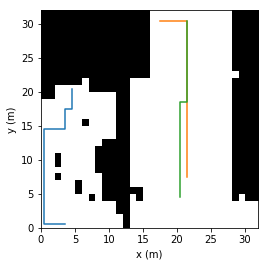

In [6]:
bofum.show_trajectories()

In [8]:
bofum.with_reachability

False

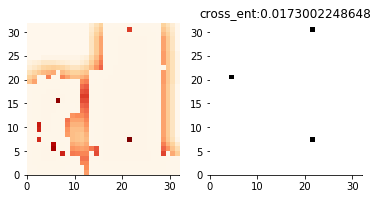

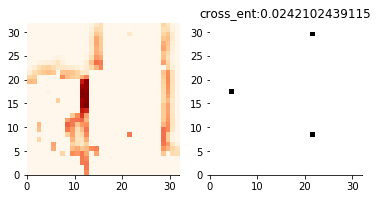

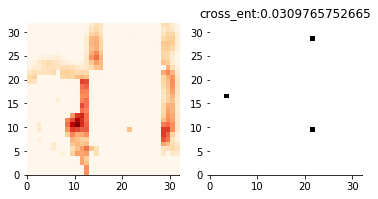

KeyboardInterrupt: 

In [7]:
for i in range(15):
    fig = plt.subplots(1, 2)
    gt = bofum.ground_truth_at(i)
    bofum.propagate(gt)
    plot = plt.subplot(1, 2, 1)
    show_map(bofum.P_Ot, resolution=bofum.map_res, cmap='OrRd')
    plt.subplot(1, 2, 2)
    show_map(gt-bofum.map, resolution=bofum.map_res)
    cross_ent = cross_entropy(bofum.map, gt, bofum.P_Ot )
    plt.title("cross_ent:{}".format(cross_ent))
    plt.show()
    raw_input()

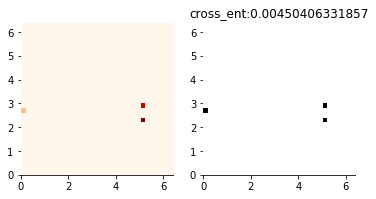

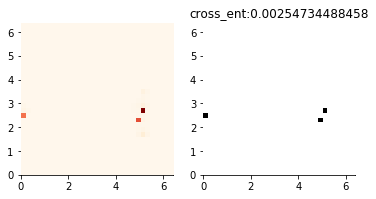

KeyboardInterrupt: 

In [14]:
for i in range(15):
    fig = plt.subplots(1, 2)
    gt = naive_bofum.ground_truth_at(i)
    naive_bofum.propagate(gt)
    plot = plt.subplot(1, 2, 1)
    show_map(naive_bofum.P_Ot, resolution=naive_bofum.map_res, cmap='OrRd')
    plt.subplot(1, 2, 2)
    show_map(gt-naive_bofum.map, resolution=naive_bofum.map_res)
    cross_ent = cross_entropy(naive_bofum.map, gt, naive_bofum.P_Ot )
    plt.title("cross_ent:{}".format(cross_ent))
    plt.show()
    raw_input()